In [1]:
import hydrobr
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import glob
import os
from datetime import datetime
import geopandas as gpd
import geobr
import rtree
import openpyxl

In [2]:
# Caminhos dos diretórios raiz
# general_path = 'C:/Users/cnalm/OneDrive/Hidroweb'    # Caminho do projeto (Cristiano)
# general_path = 'D:/Dados_Nuvem/OneDrive/Hidroweb'   # Colocar aqui o caminho de Filipe
general_path = 'C:/Users/linde/OneDrive/Hidroweb'   # Colocar aqui o caminho de Lindemberg

In [3]:
plt.style.use("ggplot")
SHP = gpd.read_file(general_path + '/SHP/Brazilian_Border.shp')

In [4]:
df_downloaded_station_info = pd.read_hdf(general_path+'/Consolidated Files/BRASIL_RAW_SUMMARY_DOWNLOADED.h5')
df_downloaded_station_info

,Name,Code,Type,SubBasin,City,State,Responsible,Latitude,Longitude,StartDate,EndDate,Years,Percentage_of_missing_data,Years_without_gaps,Percentage_of_missing_years
0,SALINÓPOLIS,00047000,2,32,SALINÓPOLIS,PARÁ,INMET,-0.6500,-47.5500,1958-01-01,1964-12-31,7,25.0,0,100.0
1,SALINÓPOLIS,00047002,2,32,SALINÓPOLIS,PARÁ,ANA,-0.6231,-47.3536,1977-12-09,2019-08-31,43,3.5,35,18.6
2,CURUÇA,00047003,2,32,CURUÇA,PARÁ,ANA,-0.7375,-47.8536,1981-07-01,2019-07-31,39,2.4,29,25.6
3,PRIMAVERA,00047004,2,32,PRIMAVERA,PARÁ,ANA,-0.9294,-47.0994,1982-02-18,2019-08-31,38,0.0,35,7.9
4,MARUDA,00047005,2,32,MARAPANIM,PARÁ,ANA,-0.6336,-47.6583,1989-08-21,2019-07-31,31,5.0,20,35.5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11721,ÁGUA FRIA,08460003,2,14,UIRAMUTA,RORAIMA,ANA,4.6428,-60.4964,1996-03-02,2018-04-30,23,1.8,16,30.4
11722,UIRAMUTA,08460004,2,14,UIRAMUTA,RORAIMA,ANA,4.5986,-60.1664,2002-07-13,2019-07-31,18,2.3,12,33.3
11723,NOVA ESPERANÇA/MARCO BV-8,08461000,2,14,PACARAIMA,RORAIMA,ANA,4.4883,-61.1297,1984-03-23,2019-06-30,36,12.3,13,63.9
11724,MISSÃO AUARIS - JUSANTE,08464001,2,14,BOA VISTA,RORAIMA,ANA,4.0031,-64.4431,1995-04-01,2019-06-30,25,4.2,15,40.0


In [5]:
bins = [0, 30, 60, 90, 120]
df_downloaded_station_info_bins = df_downloaded_station_info.set_index('Code')
df_downloaded_station_info_bins

,Name,Type,SubBasin,City,State,Responsible,Latitude,Longitude,StartDate,EndDate,Years,Percentage_of_missing_data,Years_without_gaps,Percentage_of_missing_years
Code,,,,,,,,,,,,,,
00047000,SALINÓPOLIS,2,32,SALINÓPOLIS,PARÁ,INMET,-0.6500,-47.5500,1958-01-01,1964-12-31,7,25.0,0,100.0
00047002,SALINÓPOLIS,2,32,SALINÓPOLIS,PARÁ,ANA,-0.6231,-47.3536,1977-12-09,2019-08-31,43,3.5,35,18.6
00047003,CURUÇA,2,32,CURUÇA,PARÁ,ANA,-0.7375,-47.8536,1981-07-01,2019-07-31,39,2.4,29,25.6
00047004,PRIMAVERA,2,32,PRIMAVERA,PARÁ,ANA,-0.9294,-47.0994,1982-02-18,2019-08-31,38,0.0,35,7.9
00047005,MARUDA,2,32,MARAPANIM,PARÁ,ANA,-0.6336,-47.6583,1989-08-21,2019-07-31,31,5.0,20,35.5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
08460003,ÁGUA FRIA,2,14,UIRAMUTA,RORAIMA,ANA,4.6428,-60.4964,1996-03-02,2018-04-30,23,1.8,16,30.4
08460004,UIRAMUTA,2,14,UIRAMUTA,RORAIMA,ANA,4.5986,-60.1664,2002-07-13,2019-07-31,18,2.3,12,33.3
08461000,NOVA ESPERANÇA/MARCO BV-8,2,14,PACARAIMA,RORAIMA,ANA,4.4883,-61.1297,1984-03-23,2019-06-30,36,12.3,13,63.9


In [6]:
df_downloaded_station_info_bins = pd.DataFrame(pd.cut(df_downloaded_station_info_bins['Years_without_gaps'], bins = bins, include_lowest=True))
df_downloaded_station_info_bins

,Years_without_gaps
Code,
00047000,"(-0.001, 30.0]"
00047002,"(30.0, 60.0]"
00047003,"(-0.001, 30.0]"
00047004,"(30.0, 60.0]"
00047005,"(-0.001, 30.0]"
...,...
08460003,"(-0.001, 30.0]"
08460004,"(-0.001, 30.0]"
08461000,"(-0.001, 30.0]"


In [7]:
df_downloaded_station_info_bins.reset_index(drop = False, inplace=True)
df_downloaded_station_info_bins

,Code,Years_without_gaps
0,00047000,"(-0.001, 30.0]"
1,00047002,"(30.0, 60.0]"
2,00047003,"(-0.001, 30.0]"
3,00047004,"(30.0, 60.0]"
4,00047005,"(-0.001, 30.0]"
...,...,...
11721,08460003,"(-0.001, 30.0]"
11722,08460004,"(-0.001, 30.0]"
11723,08461000,"(-0.001, 30.0]"
11724,08464001,"(-0.001, 30.0]"


In [8]:
df_downloaded_station_info_bins.columns = ['Code', 'Years_without_gaps_bins'] 
df_downloaded_station_info_bins

,Code,Years_without_gaps_bins
0,00047000,"(-0.001, 30.0]"
1,00047002,"(30.0, 60.0]"
2,00047003,"(-0.001, 30.0]"
3,00047004,"(30.0, 60.0]"
4,00047005,"(-0.001, 30.0]"
...,...,...
11721,08460003,"(-0.001, 30.0]"
11722,08460004,"(-0.001, 30.0]"
11723,08461000,"(-0.001, 30.0]"
11724,08464001,"(-0.001, 30.0]"


In [9]:
df_downloaded_station_info = df_downloaded_station_info.merge(df_downloaded_station_info_bins, how = 'left', on = 'Code')
df_downloaded_station_info

,Name,Code,Type,SubBasin,City,State,Responsible,Latitude,Longitude,StartDate,EndDate,Years,Percentage_of_missing_data,Years_without_gaps,Percentage_of_missing_years,Years_without_gaps_bins
0,SALINÓPOLIS,00047000,2,32,SALINÓPOLIS,PARÁ,INMET,-0.6500,-47.5500,1958-01-01,1964-12-31,7,25.0,0,100.0,"(-0.001, 30.0]"
1,SALINÓPOLIS,00047002,2,32,SALINÓPOLIS,PARÁ,ANA,-0.6231,-47.3536,1977-12-09,2019-08-31,43,3.5,35,18.6,"(30.0, 60.0]"
2,CURUÇA,00047003,2,32,CURUÇA,PARÁ,ANA,-0.7375,-47.8536,1981-07-01,2019-07-31,39,2.4,29,25.6,"(-0.001, 30.0]"
3,PRIMAVERA,00047004,2,32,PRIMAVERA,PARÁ,ANA,-0.9294,-47.0994,1982-02-18,2019-08-31,38,0.0,35,7.9,"(30.0, 60.0]"
4,MARUDA,00047005,2,32,MARAPANIM,PARÁ,ANA,-0.6336,-47.6583,1989-08-21,2019-07-31,31,5.0,20,35.5,"(-0.001, 30.0]"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11721,ÁGUA FRIA,08460003,2,14,UIRAMUTA,RORAIMA,ANA,4.6428,-60.4964,1996-03-02,2018-04-30,23,1.8,16,30.4,"(-0.001, 30.0]"
11722,UIRAMUTA,08460004,2,14,UIRAMUTA,RORAIMA,ANA,4.5986,-60.1664,2002-07-13,2019-07-31,18,2.3,12,33.3,"(-0.001, 30.0]"
11723,NOVA ESPERANÇA/MARCO BV-8,08461000,2,14,PACARAIMA,RORAIMA,ANA,4.4883,-61.1297,1984-03-23,2019-06-30,36,12.3,13,63.9,"(-0.001, 30.0]"
11724,MISSÃO AUARIS - JUSANTE,08464001,2,14,BOA VISTA,RORAIMA,ANA,4.0031,-64.4431,1995-04-01,2019-06-30,25,4.2,15,40.0,"(-0.001, 30.0]"


In [10]:
df_downloaded_station_geo = df_downloaded_station_info[['Code', 'Latitude', 'Longitude','Type', 'Years_without_gaps', 'Years_without_gaps_bins']]

In [11]:
geometry = gpd.points_from_xy(df_downloaded_station_geo['Longitude'], df_downloaded_station_geo['Latitude'])
stations_local_geo = gpd.GeoDataFrame(df_downloaded_station_geo, geometry=geometry, crs="EPSG:4326")
stations_local_geo

,Code,Latitude,Longitude,Type,Years_without_gaps,Years_without_gaps_bins,geometry
0,00047000,-0.6500,-47.5500,2,0,"(-0.001, 30.0]",POINT (-47.55000 -0.65000)
1,00047002,-0.6231,-47.3536,2,35,"(30.0, 60.0]",POINT (-47.35360 -0.62310)
2,00047003,-0.7375,-47.8536,2,29,"(-0.001, 30.0]",POINT (-47.85360 -0.73750)
3,00047004,-0.9294,-47.0994,2,35,"(30.0, 60.0]",POINT (-47.09940 -0.92940)
4,00047005,-0.6336,-47.6583,2,20,"(-0.001, 30.0]",POINT (-47.65830 -0.63360)
...,...,...,...,...,...,...,...
11721,08460003,4.6428,-60.4964,2,16,"(-0.001, 30.0]",POINT (-60.49640 4.64280)
11722,08460004,4.5986,-60.1664,2,12,"(-0.001, 30.0]",POINT (-60.16640 4.59860)
11723,08461000,4.4883,-61.1297,2,13,"(-0.001, 30.0]",POINT (-61.12970 4.48830)
11724,08464001,4.0031,-64.4431,2,15,"(-0.001, 30.0]",POINT (-64.44310 4.00310)


In [12]:
df_downloaded_station_geo_30 = df_downloaded_station_geo[df_downloaded_station_geo['Years_without_gaps'] <= 30]
geometry = gpd.points_from_xy(df_downloaded_station_geo_30['Longitude'], df_downloaded_station_geo_30['Latitude'])
stations_local_geo_30 = gpd.GeoDataFrame(df_downloaded_station_geo_30, geometry=geometry, crs="EPSG:4326")
stations_local_geo_30

,Code,Latitude,Longitude,Type,Years_without_gaps,Years_without_gaps_bins,geometry
0,00047000,-0.6500,-47.5500,2,0,"(-0.001, 30.0]",POINT (-47.55000 -0.65000)
2,00047003,-0.7375,-47.8536,2,29,"(-0.001, 30.0]",POINT (-47.85360 -0.73750)
4,00047005,-0.6336,-47.6583,2,20,"(-0.001, 30.0]",POINT (-47.65830 -0.63360)
5,00047006,-0.7747,-47.1775,2,25,"(-0.001, 30.0]",POINT (-47.17750 -0.77470)
6,00047007,-0.7944,-47.5997,2,20,"(-0.001, 30.0]",POINT (-47.59970 -0.79440)
...,...,...,...,...,...,...,...
11721,08460003,4.6428,-60.4964,2,16,"(-0.001, 30.0]",POINT (-60.49640 4.64280)
11722,08460004,4.5986,-60.1664,2,12,"(-0.001, 30.0]",POINT (-60.16640 4.59860)
11723,08461000,4.4883,-61.1297,2,13,"(-0.001, 30.0]",POINT (-61.12970 4.48830)
11724,08464001,4.0031,-64.4431,2,15,"(-0.001, 30.0]",POINT (-64.44310 4.00310)


In [13]:
df_downloaded_station_geo_60 = df_downloaded_station_geo[(df_downloaded_station_geo['Years_without_gaps'] >30) & (df_downloaded_station_geo['Years_without_gaps'] <=60)]
geometry = gpd.points_from_xy(df_downloaded_station_geo_60['Longitude'], df_downloaded_station_geo_60['Latitude'])
stations_local_geo_60 = gpd.GeoDataFrame(df_downloaded_station_geo_60, geometry=geometry, crs="EPSG:4326")
stations_local_geo_60

,Code,Latitude,Longitude,Type,Years_without_gaps,Years_without_gaps_bins,geometry
1,00047002,-0.6231,-47.3536,2,35,"(30.0, 60.0]",POINT (-47.35360 -0.62310)
3,00047004,-0.9294,-47.0994,2,35,"(30.0, 60.0]",POINT (-47.09940 -0.92940)
12,00048006,-0.8681,-48.1103,2,32,"(30.0, 60.0]",POINT (-48.11030 -0.86810)
34,00052000,-0.5711,-52.5750,2,31,"(30.0, 60.0]",POINT (-52.57500 -0.57110)
45,00061000,-0.5067,-61.7858,2,42,"(30.0, 60.0]",POINT (-61.78580 -0.50670)
...,...,...,...,...,...,...,...
11688,08261000,2.8708,-61.4406,2,36,"(30.0, 60.0]",POINT (-61.44060 2.87080)
11696,08351002,3.8436,-51.8375,2,31,"(30.0, 60.0]",POINT (-51.83750 3.84360)
11700,08360000,4.1667,-60.5289,2,35,"(30.0, 60.0]",POINT (-60.52890 4.16670)
11710,08361001,3.2906,-61.2881,2,36,"(30.0, 60.0]",POINT (-61.28810 3.29060)


In [14]:
df_downloaded_station_geo_90 = df_downloaded_station_geo[(df_downloaded_station_geo['Years_without_gaps'] >60) & (df_downloaded_station_geo['Years_without_gaps'] <=90)]
geometry = gpd.points_from_xy(df_downloaded_station_geo_90['Longitude'], df_downloaded_station_geo_90['Latitude'])
stations_local_geo_90 = gpd.GeoDataFrame(df_downloaded_station_geo_90, geometry=geometry, crs="EPSG:4326")
stations_local_geo_90

,Code,Latitude,Longitude,Type,Years_without_gaps,Years_without_gaps_bins,geometry
181,00240001,-2.8833,-40.1167,2,75,"(60.0, 90.0]",POINT (-40.11670 -2.88330)
195,00241000,-2.8833,-41.6667,2,76,"(60.0, 90.0]",POINT (-41.66670 -2.88330)
210,00244006,-2.8833,-44.3500,2,68,"(60.0, 90.0]",POINT (-44.35000 -2.88330)
306,00338000,-3.7667,-38.8833,2,80,"(60.0, 90.0]",POINT (-38.88330 -3.76670)
308,00338002,-3.9833,-38.6167,2,73,"(60.0, 90.0]",POINT (-38.61670 -3.98330)
...,...,...,...,...,...,...,...
11392,02954001,-29.8786,-54.8253,2,69,"(60.0, 90.0]",POINT (-54.82530 -29.87860)
11466,03052007,-30.9064,-52.4619,2,69,"(60.0, 90.0]",POINT (-52.46190 -30.90640)
11468,03052009,-30.8864,-52.2486,2,70,"(60.0, 90.0]",POINT (-52.24860 -30.88640)
11480,03053007,-30.8175,-53.9014,2,70,"(60.0, 90.0]",POINT (-53.90140 -30.81750)


In [15]:
df_downloaded_station_geo_120 = df_downloaded_station_geo[(df_downloaded_station_geo['Years_without_gaps'] >90) & (df_downloaded_station_geo['Years_without_gaps'] <=120)]
geometry = gpd.points_from_xy(df_downloaded_station_geo_120['Longitude'], df_downloaded_station_geo_120['Latitude'])
stations_local_geo_120 = gpd.GeoDataFrame(df_downloaded_station_geo_120, geometry=geometry, crs="EPSG:4326")
stations_local_geo_120.head(5)

,Code,Latitude,Longitude,Type,Years_without_gaps,Years_without_gaps_bins,geometry
307,00338001,-3.7500,-38.5833,2,93,"(90.0, 120.0]",POINT (-38.58330 -3.75000)
314,00338009,-3.7500,-38.6833,2,100,"(90.0, 120.0]",POINT (-38.68330 -3.75000)
320,00338016,-3.9000,-38.6667,2,101,"(90.0, 120.0]",POINT (-38.66670 -3.90000)
369,00339014,-3.6833,-39.5833,2,93,"(90.0, 120.0]",POINT (-39.58330 -3.68330)
464,00340014,-3.9500,-40.4667,2,98,"(90.0, 120.0]",POINT (-40.46670 -3.95000)


In [16]:
df_downloaded_station_geo_30_plus = df_downloaded_station_geo[(df_downloaded_station_geo['Years_without_gaps'] >= 30)]
geometry = gpd.points_from_xy(df_downloaded_station_geo_30_plus['Longitude'], df_downloaded_station_geo_30_plus['Latitude'])
stations_local_geo_30_plus = gpd.GeoDataFrame(df_downloaded_station_geo_30_plus, geometry=geometry, crs="EPSG:4326")
stations_local_geo_30_plus.head(3)

,Code,Latitude,Longitude,Type,Years_without_gaps,Years_without_gaps_bins,geometry
1,00047002,-0.6231,-47.3536,2,35,"(30.0, 60.0]",POINT (-47.35360 -0.62310)
3,00047004,-0.9294,-47.0994,2,35,"(30.0, 60.0]",POINT (-47.09940 -0.92940)
12,00048006,-0.8681,-48.1103,2,32,"(30.0, 60.0]",POINT (-48.11030 -0.86810)


In [17]:
df_downloaded_station_geo_60_plus = df_downloaded_station_geo[(df_downloaded_station_geo['Years_without_gaps'] >= 60)]
geometry = gpd.points_from_xy(df_downloaded_station_geo_60_plus['Longitude'], df_downloaded_station_geo_60_plus['Latitude'])
stations_local_geo_60_plus = gpd.GeoDataFrame(df_downloaded_station_geo_60_plus, geometry=geometry, crs="EPSG:4326")
stations_local_geo_60_plus.head(3)

,Code,Latitude,Longitude,Type,Years_without_gaps,Years_without_gaps_bins,geometry
181,00240001,-2.8833,-40.1167,2,75,"(60.0, 90.0]",POINT (-40.11670 -2.88330)
195,00241000,-2.8833,-41.6667,2,76,"(60.0, 90.0]",POINT (-41.66670 -2.88330)
210,00244006,-2.8833,-44.3500,2,68,"(60.0, 90.0]",POINT (-44.35000 -2.88330)


In [18]:
df_downloaded_station_geo_90_plus = df_downloaded_station_geo[(df_downloaded_station_geo['Years_without_gaps'] >= 90)]
geometry = gpd.points_from_xy(df_downloaded_station_geo_90_plus['Longitude'], df_downloaded_station_geo_90_plus['Latitude'])
stations_local_geo_90_plus = gpd.GeoDataFrame(df_downloaded_station_geo_90_plus, geometry=geometry, crs="EPSG:4326")
stations_local_geo_90_plus.head(3)

,Code,Latitude,Longitude,Type,Years_without_gaps,Years_without_gaps_bins,geometry
307,00338001,-3.75,-38.5833,2,93,"(90.0, 120.0]",POINT (-38.58330 -3.75000)
314,00338009,-3.75,-38.6833,2,100,"(90.0, 120.0]",POINT (-38.68330 -3.75000)
320,00338016,-3.90,-38.6667,2,101,"(90.0, 120.0]",POINT (-38.66670 -3.90000)


In [19]:
stations_local_geo.dtypes

Code                         object
Latitude                    float64
Longitude                   float64
Type                          int64
Years_without_gaps            int64
Years_without_gaps_bins    category
geometry                   geometry
dtype: object

In [20]:
br_map = geobr.read_state(year = 2020)
br_map.crs = "EPSG:4326"
br_map['name_state'] = br_map['name_state'].apply(str.upper)
br_map = br_map.sort_values(by = ['name_state'])
br_map['name_state'].replace({'AMAZÔNAS': 'AMAZONAS'}, inplace = True)
br_map.head()

,code_state,abbrev_state,name_state,code_region,name_region,geometry
1,12.0,AC,ACRE,1.0,Norte,"MULTIPOLYGON (((-71.07772 -9.82774, -71.07817 ..."
13,27.0,AL,ALAGOAS,2.0,Nordeste,"MULTIPOLYGON (((-35.75791 -9.69285, -35.75801 ..."
5,16.0,AP,AMAPÁ,1.0,Norte,"MULTIPOLYGON (((-50.45011 2.10924, -50.44715 2..."
2,13.0,AM,AMAZONAS,1.0,Norte,"MULTIPOLYGON (((-69.83766 -3.68659, -69.82555 ..."
15,29.0,BA,BAHIA,2.0,Nordeste,"MULTIPOLYGON (((-38.69616 -17.97901, -38.69618..."


In [21]:
# fig, ax = plt.subplots(figsize = (8, 8))
# SHP.plot(ax = ax, color = 'w')
# br_map.plot(ax = ax, color = 'white', edgecolor = 'black')
# # stations_local_geo.plot(ax = ax, cmap = 'Blues_r', s = 1, legend = False, column = 'Type')
# # stations_local_geo_30.plot(ax = ax, cmap = 'winter', s = 1, legend = False, column = 'Type')
# stations_local_geo_60.plot(ax = ax, cmap = 'summer', s = 2, legend = False, column = 'Type')
# # stations_local_geo_90.plot(ax = ax, cmap = 'spring', s = 3, legend = False, column = 'Type')
# # stations_local_geo_120.plot(ax = ax, cmap = 'Reds_r', s = 4, legend = False, column = 'Type')

# #Colocando nome em cada ponto
# #for x, y, label in zip(postos1.geometry.x, postos1.geometry.y, postos1.city):
# #    ax.annotate(label, xy=(x, y), xytext=(-10, -1), textcoords="offset points", color = "k",  rotation=-25)
# ax.set_ylim([-34.9, 7])
# ax.set_xlim([-74.9, -33])

# # ax.set_title('Distribution of Stations', fontsize=18)
# ax.set_xlabel('Latitude', fontsize=14)
# ax.set_ylabel('Longitude', fontsize=14)
# ax.grid(ls='--')
# # ax.legend(loc="lower right", prop={'size':1}, shadow = False)
# plt.tight_layout()
# plt.savefig(general_path+'/Figures/ANA_stations_90.jpeg', format='jpeg', dpi=1200, transparent=False, bbox_inches=None)
# plt.show()
# plt.close()

### At least 30 years of complete recorded data

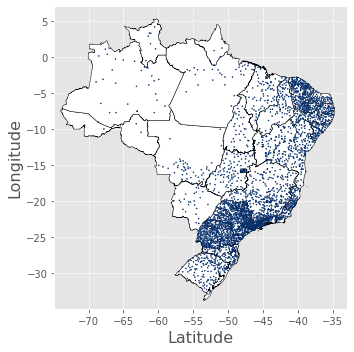

In [22]:
fig, ax = plt.subplots(figsize = (5, 5))
SHP.plot(ax = ax, color = 'w')
br_map.plot(ax = ax, color = 'white', edgecolor = 'black')
stations_local_geo_30_plus.plot(ax = ax, cmap = 'Blues_r', s = 1, legend = False, column = 'Type')

#Colocando nome em cada ponto
#for x, y, label in zip(postos1.geometry.x, postos1.geometry.y, postos1.city):
#    ax.annotate(label, xy=(x, y), xytext=(-10, -1), textcoords="offset points", color = "k",  rotation=-25)
ax.set_ylim([-34.9, 7])
ax.set_xlim([-74.9, -33])

# ax.set_title('Distribution of Stations', fontsize=18)
ax.set_xlabel('Latitude', fontsize=16)
ax.set_ylabel('Longitude', fontsize=16)
ax.grid(ls='--')
# ax.legend(loc="lower right", prop={'size':1}, shadow = False)
plt.tight_layout()
plt.savefig(general_path+'/Figures/ANA_stations_30_plus.jpeg', format='jpeg', dpi=1200, transparent=False, bbox_inches=None)
plt.show()
plt.close()

### At least 60 years of complete recorded data

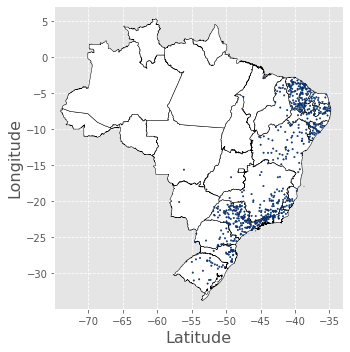

In [23]:
fig, ax = plt.subplots(figsize = (5, 5))
SHP.plot(ax = ax, color = 'w')
br_map.plot(ax = ax, color = 'white', edgecolor = 'black')
stations_local_geo_60_plus.plot(ax = ax, cmap = 'Blues_r', s = 2, legend = False, column = 'Type')

#Colocando nome em cada ponto
#for x, y, label in zip(postos1.geometry.x, postos1.geometry.y, postos1.city):
#    ax.annotate(label, xy=(x, y), xytext=(-10, -1), textcoords="offset points", color = "k",  rotation=-25)
ax.set_ylim([-34.9, 7])
ax.set_xlim([-74.9, -33])

# ax.set_title('Distribution of Stations', fontsize=18)
ax.set_xlabel('Latitude', fontsize=16)
ax.set_ylabel('Longitude', fontsize=16)
ax.grid(ls='--')
# ax.legend(loc="lower right", prop={'size':1}, shadow = False)
plt.tight_layout()
plt.savefig(general_path+'/Figures/ANA_stations_60_plus.jpeg', format='jpeg', dpi=1200, transparent=False, bbox_inches=None)
plt.show()
plt.close()

### At least 90 years of complete recorded data

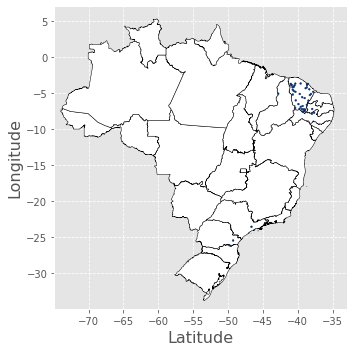

In [24]:
fig, ax = plt.subplots(figsize = (5, 5))
SHP.plot(ax = ax, color = 'w')
br_map.plot(ax = ax, color = 'white', edgecolor = 'black')
stations_local_geo_90_plus.plot(ax = ax, cmap = 'Blues_r', s = 3, legend = False, column = 'Type')

#Colocando nome em cada ponto
#for x, y, label in zip(postos1.geometry.x, postos1.geometry.y, postos1.city):
#    ax.annotate(label, xy=(x, y), xytext=(-10, -1), textcoords="offset points", color = "k",  rotation=-25)
ax.set_ylim([-34.9, 7])
ax.set_xlim([-74.9, -33])

# ax.set_title('Distribution of Stations', fontsize=18)
ax.set_xlabel('Latitude', fontsize=16)
ax.set_ylabel('Longitude', fontsize=16)
ax.grid(ls='--')
# ax.legend(loc="lower right", prop={'size':1}, shadow = False)
plt.tight_layout()
plt.savefig(general_path+'/Figures/ANA_stations_90_plus.jpeg', format='jpeg', dpi=1200, transparent=False, bbox_inches=None)
plt.show()
plt.close()

###  Density with labels

In [25]:
br_map = geobr.read_state(year = 2020)
br_map.crs = "EPSG:4326"
br_map['name_state'] = br_map['name_state'].apply(str.upper)
br_map = br_map.sort_values(by = ['name_state'])
br_map['name_state'].replace({'AMAZÔNAS': 'AMAZONAS'}, inplace = True)
br_map.head()

,code_state,abbrev_state,name_state,code_region,name_region,geometry
1,12.0,AC,ACRE,1.0,Norte,"MULTIPOLYGON (((-71.07772 -9.82774, -71.07817 ..."
13,27.0,AL,ALAGOAS,2.0,Nordeste,"MULTIPOLYGON (((-35.75791 -9.69285, -35.75801 ..."
5,16.0,AP,AMAPÁ,1.0,Norte,"MULTIPOLYGON (((-50.45011 2.10924, -50.44715 2..."
2,13.0,AM,AMAZONAS,1.0,Norte,"MULTIPOLYGON (((-69.83766 -3.68659, -69.82555 ..."
15,29.0,BA,BAHIA,2.0,Nordeste,"MULTIPOLYGON (((-38.69616 -17.97901, -38.69618..."


In [26]:
df_count = pd.read_excel(general_path+"/Docs/station_count.xlsx", sheet_name = "densidade")
df_count = df_count.sort_values(by = ['Unidade_Federativa'])
df_count

,Unidade_Federativa,Regiao,Area,Estacao,Densidade
0,ACRE,N,164123.964,50,3282.479280
1,ALAGOAS,NE,27848.140,117,238.018291
2,AMAPÁ,N,142470.762,38,3749.230579
3,AMAZONAS,N,1559167.889,268,5817.790631
4,BAHIA,NE,564760.427,1226,460.652877
5,CEARÁ,NE,148894.441,1142,130.380421
6,DISTRITO FEDERAL,CO,5760.783,83,69.407024
7,ESPÍRITO SANTO,SE,46074.447,170,271.026159
8,GOIÁS,CO,340203.329,236,1441.539530
9,MARANHÃO,NE,329642.182,241,1367.809884


In [27]:
br_map_count = br_map.merge(df_count, left_on='name_state', right_on='Unidade_Federativa')
br_map_count = br_map_count.sort_values(by = ['name_state'])
br_map_count = gpd.GeoDataFrame(br_map_count)
br_map_count['centroid'] = gpd.GeoSeries(br_map_count['geometry']).centroid
br_map_count['Densidade'] = br_map_count['Densidade'].astype(int)
br_map_count = gpd.GeoDataFrame(br_map_count)
br_map_count

C:\Users\linde\AppData\Local\Temp\ipykernel_71628\2278816712.py:4: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  br_map_density['centroid'] = gpd.GeoSeries(br_map_density['geometry']).centroid


,code_state,abbrev_state,name_state,code_region,name_region,geometry,Unidade_Federativa,Regiao,Area,Estacao,Densidade,centroid
0,12.0,AC,ACRE,1.0,Norte,"MULTIPOLYGON (((-71.07772 -9.82774, -71.07817 ...",ACRE,N,164123.964,50,3282,POINT (-70.47293 -9.21327)
1,27.0,AL,ALAGOAS,2.0,Nordeste,"MULTIPOLYGON (((-35.75791 -9.69285, -35.75801 ...",ALAGOAS,NE,27848.140,117,238,POINT (-36.62485 -9.51367)
2,16.0,AP,AMAPÁ,1.0,Norte,"MULTIPOLYGON (((-50.45011 2.10924, -50.44715 2...",AMAPÁ,N,142470.762,38,3749,POINT (-51.96202 1.44746)
3,13.0,AM,AMAZONAS,1.0,Norte,"MULTIPOLYGON (((-69.83766 -3.68659, -69.82555 ...",AMAZONAS,N,1559167.889,268,5817,POINT (-64.65309 -4.15410)
4,29.0,BA,BAHIA,2.0,Nordeste,"MULTIPOLYGON (((-38.69616 -17.97901, -38.69618...",BAHIA,NE,564760.427,1226,460,POINT (-41.72116 -12.47533)
5,23.0,CE,CEARÁ,2.0,Nordeste,"MULTIPOLYGON (((-41.18292 -4.01797, -41.18552 ...",CEARÁ,NE,148894.441,1142,130,POINT (-39.61579 -5.09322)
6,53.0,DF,DISTRITO FEDERAL,5.0,Centro Oeste,"MULTIPOLYGON (((-47.41734 -15.54655, -47.41720...",DISTRITO FEDERAL,CO,5760.783,83,69,POINT (-47.79685 -15.78117)
7,32.0,ES,ESPÍRITO SANTO,3.0,Sudeste,"MULTIPOLYGON (((-40.75189 -20.92722, -40.75193...",ESPÍRITO SANTO,SE,46074.447,170,271,POINT (-40.66851 -19.57518)
8,52.0,GO,GOIÁS,5.0,Centro Oeste,"MULTIPOLYGON (((-52.36102 -16.08160, -52.36040...",GOIÁS,CO,340203.329,236,1441,POINT (-49.62251 -16.04119)
9,21.0,MA,MARANHÃO,2.0,Nordeste,"MULTIPOLYGON (((-44.96620 -1.27114, -44.96081 ...",MARANHÃO,NE,329642.182,241,1367,POINT (-45.28777 -5.07221)


C:\Users\linde\AppData\Local\Temp\ipykernel_71628\508414416.py:16: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  for x, y, label in zip(br_map_density.centroid.x, br_map_density.centroid.y, br_map_density.Densidade):


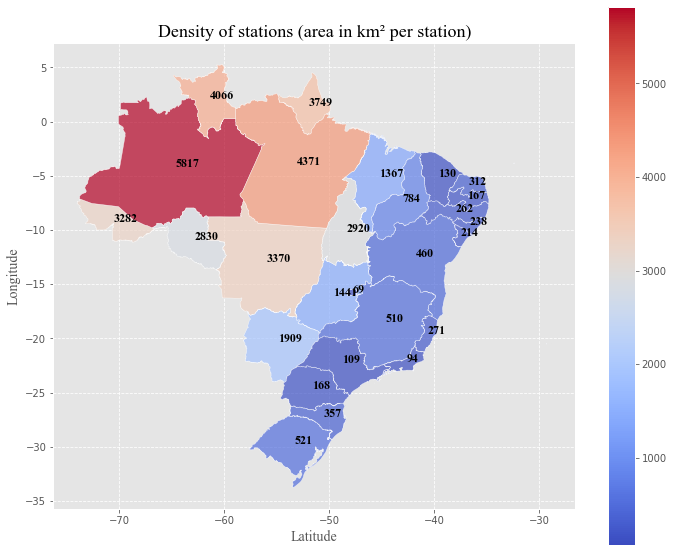

In [29]:
tnr_nrm = {'fontname':'Times New Roman'}
tnr = {'fontname':'Times New Roman', "fontweight" :"bold", 'fontsize':12}

fig, ax = plt.subplots(figsize = (10, 8))
br_map_count.plot(ax = ax
                    , edgecolor = 'white'
                    , column = 'Densidade'
                    , legend = True
                    , cmap = 'coolwarm'
                    , alpha = 0.70
#                     'RdYlGn_r' 'winter'
                   )
ax.set_title("Density of stations (area in km² per station)", fontsize=18, **tnr_nrm)

#Colocando nome em cada ponto
for x, y, label in zip(br_map_count.centroid.x, br_map_count.centroid.y, br_map_count.Densidade):
   ax.annotate(label, xy=(x, y), xytext=(0, 0), textcoords="offset points", color = "black",  rotation=0, **tnr)

ax.set_xlabel('Latitude', fontsize=14, **tnr_nrm)
ax.set_ylabel('Longitude', fontsize=14, **tnr_nrm)
ax.grid(ls='--')
plt.tight_layout()
plt.savefig(general_path+'/Figures/ANA_stations_count_by_state.jpeg', format='jpeg', dpi=1200, transparent=False, bbox_inches=None)
plt.show()
plt.close()

In [37]:
df_station_by_year = pd.read_hdf(general_path + '/Consolidated Files/BRASIL_RAW_STATION_BY_YEAR.h5')
df_station_by_year.head(3)

,Code,Year
0,00047000,1958
1,00047000,1959
2,00047000,1960


In [43]:
year_list = np.arange(1855, 2023, 1).tolist()

In [44]:
filt = df_station_by_year['Year'].isin(year_list)
df_station_by_decade = df_station_by_year[filt]
df_station_by_decade.head()

,Code,Year
0,00047000,1958
1,00047000,1959
2,00047000,1960
3,00047000,1961
4,00047000,1962


In [45]:
df_merge = df_station_by_decade.merge(stations_local_geo, how = 'left', on = 'Code')
geometry = gpd.points_from_xy(df_merge['Longitude'], df_merge['Latitude'])
df_merge = gpd.GeoDataFrame(df_merge, geometry=geometry, crs="EPSG:4326")
df_merge

,Code,Year,Latitude,Longitude,Type,Years_without_gaps,Years_without_gaps_bins,geometry
0,00047000,1958,-0.6500,-47.5500,2,0,"(-0.001, 30.0]",POINT (-47.55000 -0.65000)
1,00047000,1959,-0.6500,-47.5500,2,0,"(-0.001, 30.0]",POINT (-47.55000 -0.65000)
2,00047000,1960,-0.6500,-47.5500,2,0,"(-0.001, 30.0]",POINT (-47.55000 -0.65000)
3,00047000,1961,-0.6500,-47.5500,2,0,"(-0.001, 30.0]",POINT (-47.55000 -0.65000)
4,00047000,1962,-0.6500,-47.5500,2,0,"(-0.001, 30.0]",POINT (-47.55000 -0.65000)
...,...,...,...,...,...,...,...,...
378658,08560000,1992,4.6306,-60.4706,2,12,"(-0.001, 30.0]",POINT (-60.47060 4.63060)
378659,08560000,1993,4.6306,-60.4706,2,12,"(-0.001, 30.0]",POINT (-60.47060 4.63060)
378660,08560000,1994,4.6306,-60.4706,2,12,"(-0.001, 30.0]",POINT (-60.47060 4.63060)
378661,08560000,1995,4.6306,-60.4706,2,12,"(-0.001, 30.0]",POINT (-60.47060 4.63060)


In [15]:
# for year in year_list:
#     filt = df_merge['Year'].isin([year])
#     df_temp = df_merge[filt]
#     geometry = gpd.points_from_xy(df_temp['Longitude'], df_temp['Latitude'])
#     df_temp = gpd.GeoDataFrame(df_temp, geometry=geometry, crs="EPSG:4326")
#     fig, ax = plt.subplots(figsize = (8, 8))
#     SHP.plot(ax = ax, color = 'w')
#     df_temp.plot(ax = ax, cmap = 'winter', s = 2, legend = False, column = 'Type')

#     #Colocando nome em cada ponto
#     #for x, y, label in zip(postos1.geometry.x, postos1.geometry.y, postos1.city):
#     #    ax.annotate(label, xy=(x, y), xytext=(-10, -1), textcoords="offset points", color = "k",  rotation=-25)

#     ax.set_ylim([-34.9, 7])
#     ax.set_xlim([-74.9, -33])

#     ax.set_title('Distribution of Stations ('+str(year)+')', fontsize=18)
#     ax.set_xlabel('Latitude', fontsize=14)
#     ax.set_ylabel('Longitude', fontsize=14)
#     ax.grid(ls='--')
#     ax.legend(loc="lower right", prop={'size':1}, shadow = False)
#     plt.tight_layout()
#     plt.savefig(general_path+'/Figures/ANA_stations_'+str(year)+'.jpeg', format='jpeg', dpi=1200, transparent=False, bbox_inches=None)
#     plt.show()
#     plt.close()


KeyboardInterrupt



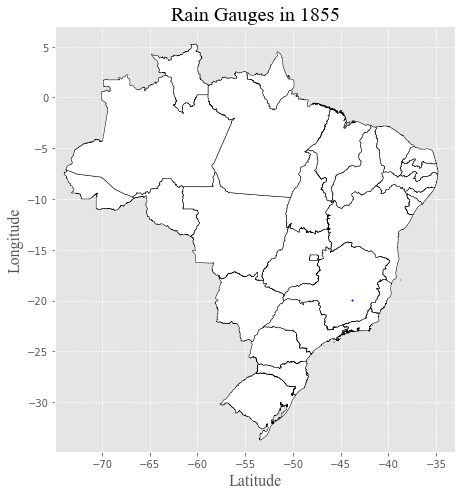

In [46]:
tnr = {'fontname':'Times New Roman'}
for year in year_list:
    filt = df_merge['Year'].isin([year])
    df_temp = df_merge[filt]
    geometry = gpd.points_from_xy(df_temp['Longitude'], df_temp['Latitude'])
    df_temp = gpd.GeoDataFrame(df_temp, geometry=geometry, crs="EPSG:4326")
    fig, ax = plt.subplots(figsize = (7, 7))
    br_map.plot(ax = ax, color = 'white', edgecolor = 'black')
    df_temp.plot(ax = ax, cmap = 'winter', s = 2, legend = False, column = 'Type')
    ax.set_ylim([-34.9, 7])
    ax.set_xlim([-74.9, -33])
    ax.set_title('Rain Gauges in '+str(year), fontsize=20, fontfamily = "Times New Roman")
    ax.set_xlabel('Latitude', fontsize=16, fontfamily = "Times New Roman")
    ax.set_ylabel('Longitude', fontsize=16, fontfamily = "Times New Roman")
    ax.grid(ls='--')
#     ax.legend(loc="lower right", prop={'size':1}, shadow = False)
    plt.tight_layout()
    plt.savefig(general_path+'/Figures/ANA_stations_'+str(year)+'.jpeg', format='jpeg', dpi=1200, transparent=False, bbox_inches=None)
    plt.show()
    plt.close()